In [108]:
import pandas as pd
df=pd.read_csv("extended_multi_omics_data.csv")
df.head(10)

Unnamed: 0  BRCA1_genomic  BRCA1_transcriptomic  BRCA1_proteomic  \
0           0       0.496714             -0.138264         0.647689   
1           1       1.465649             -0.225776         0.067528   
2           2       0.738467              0.171368        -0.115648   
3           3      -0.479174                   NaN        -1.106335   
4           4      -0.219672              0.357113         1.477894   
5           5      -1.415371             -0.420645        -0.342715   
6           6       0.791032             -0.909387         1.402794   
7           7       0.227460              1.307143        -1.607483   
8           8      -0.974682              0.787085         1.158596   
9           9       0.625667             -0.857158        -1.070892   

   BRCA2_genomic  BRCA2_transcriptomic  BRCA2_proteomic  TP53_genomic  \
0       1.523030             -0.234153        -0.234137      1.579213   
1      -1.424748             -0.544383         0.110923     -1.150994   
2      -0.301104             -1.478522        -0.719844     -0.460639   
3      -1.196207              0.812526         1.356240     -0.072010   
4      -0.518270             -0.808494        -0.501757      0.915402   
5      -0.802277             -0.161286         0.404051      1.886186   
6      -1.401851              0.586857         2.190456     -0.990536   
7       0.184634              0.259883         0.781823     -1.236951   
8      -0.820682              0.963376         0.412781      0.822060   
9       0.482472             -0.223463         0.714000      0.473238   

   TP53_transcriptomic  TP53_proteomic  ...  SMAD4_proteomic  \
0             0.767435             NaN  ...         0.610284   
1             0.375698       -0.600639  ...         0.460467   
2             1.057122        0.343618  ...         0.002044   
3             1.003533        0.361636  ...              NaN   
4             0.328751       -0.529760  ...        -0.400056   
5             0.174578        0.257550  ...         0.987944   
6            -0.566298        0.099651  ...         0.957249   
7            -1.320457        0.521942  ...        -0.014501   
8             1.896793       -0.245388  ...        -0.481510   
9            -0.072829       -0.846794  ...         0.304882   

   resistance_label  age  gender  ethnicity  chemotherapy_type  \
0               NaN   68    Male  Caucasian          Regimen B   
1         sensitive   58    Male      Asian          Regimen C   
2         sensitive   44    Male   Hispanic          Regimen C   
3         sensitive   72  Female   Hispanic          Regimen B   
4               NaN   37    Male      Asian          Regimen A   
5         resistant   50  Female      Black          Regimen B   
6         sensitive   68  Female      Asian          Regimen C   
7         sensitive   48    Male      Asian          Regimen A   
8         sensitive   52  Female  Caucasian          Regimen B   
9         sensitive   40  Female  Caucasian          Regimen B   

   treatment_duration  tumor_grade  tumor_stage  clinical_outcome  
0                  11            2      Stage I       Progression  
1                   4            1    Stage III         Remission  
2                   5            3     Stage IV         Remission  
3                   4            2     Stage II         Remission  
4                   5            1      Stage I         Remission  
5                   8            1     Stage IV         Remission  
6                  11            3     Stage II         Remission  
7                  11            1     Stage IV            Stable  
8                   9            3      Stage I         Remission  
9                   5            1      Stage I            Stable  

[10 rows x 70 columns]

In [109]:
df=df.drop('Unnamed: 0',axis=1)

In [110]:
df.isna().sum()

BRCA1_genomic           37
BRCA1_transcriptomic    34
BRCA1_proteomic         27
BRCA2_genomic           32
BRCA2_transcriptomic    21
                        ..
chemotherapy_type        0
treatment_duration       0
tumor_grade              0
tumor_stage              0
clinical_outcome         0
Length: 69, dtype: int64

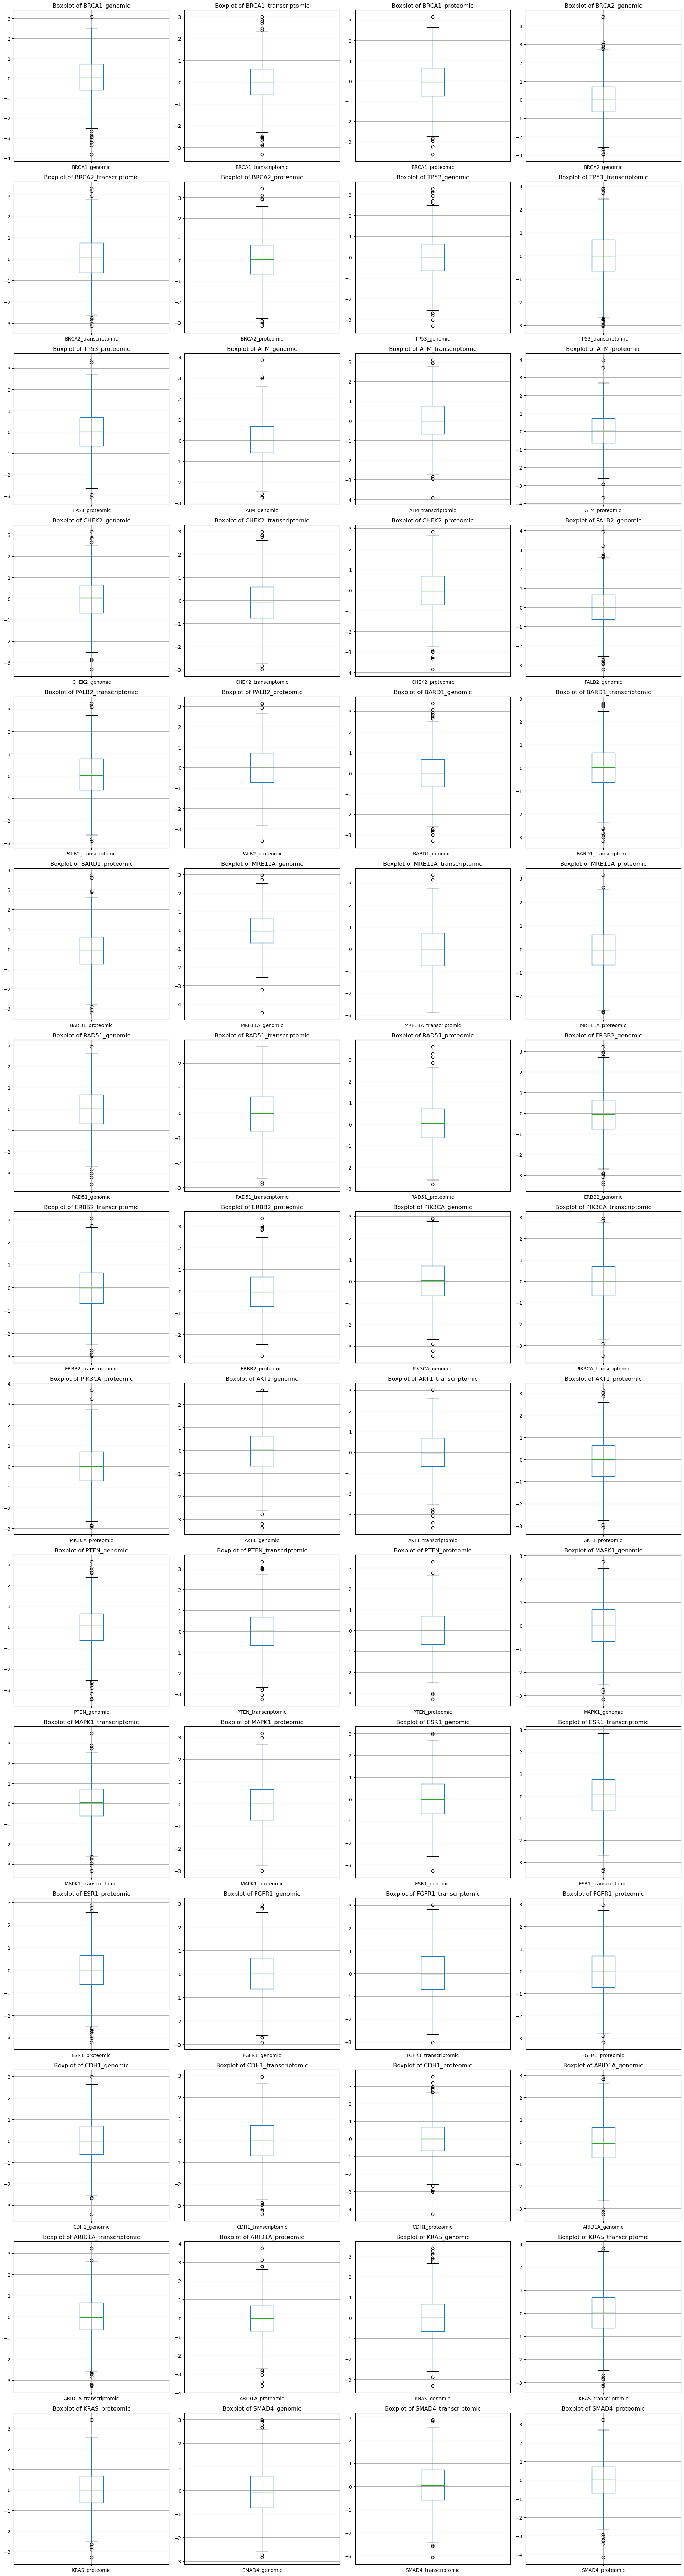

In [111]:
import matplotlib.pyplot as plt

# Visualizing histograms and boxplots for all continuous features in the dataset
continuous_features = [col for col in df.columns if 'genomic' in col or 'transcriptomic' in col or 'proteomic' in col]

# Setting up the plot dimensions based on the number of features
num_features = len(continuous_features)
rows = num_features // 4 + (num_features % 4 > 0)  # Arranging plots in a manageable way

# Create histograms for each feature
#plt.figure(figsize=(20, 5 * rows))
#for i, feature in enumerate(continuous_features):
  #  plt.subplot(rows, 4, i+1)
  #  df[feature].dropna().hist(bins=30, alpha=0.5, color='blue')
   # plt.title(f'Histogram of {feature}')
#plt.tight_layout()
#plt.show()

# Create boxplots for each feature
plt.figure(figsize=(20, 5 * rows))
for i, feature in enumerate(continuous_features):
    plt.subplot(rows, 4, i+1)
    df.boxplot(column=[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [112]:
len(df.columns)-1/3


68.66666666666667

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer



In [116]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

#categorical valuse
df_encoded = pd.get_dummies(df, columns=['ethnicity','chemotherapy_type','tumor_stage','clinical_outcome'], drop_first=False)
df_encoded


BRCA1_genomic  BRCA1_transcriptomic  BRCA1_proteomic  BRCA2_genomic  \
0         0.496714             -0.138264         0.647689       1.523030   
1         1.465649             -0.225776         0.067528      -1.424748   
2         0.738467              0.171368        -0.115648      -0.301104   
3        -0.479174                   NaN        -1.106335      -1.196207   
4        -0.219672              0.357113         1.477894      -0.518270   
..             ...                   ...              ...            ...   
995       0.121244             -0.554667        -1.852343       0.247086   
996      -1.938527              0.596334        -1.785026      -0.228218   
997      -0.691931              0.489962         0.960061       0.299796   
998      -0.116764             -0.667223        -2.876032      -0.728529   
999       0.962592              0.512600        -0.753112       0.076102   

     BRCA2_transcriptomic  BRCA2_proteomic  TP53_genomic  TP53_transcriptomic  \
0               -0.234153        -0.234137      1.579213             0.767435   
1               -0.544383         0.110923     -1.150994             0.375698   
2               -1.478522        -0.719844     -0.460639             1.057122   
3                0.812526         1.356240     -0.072010             1.003533   
4               -0.808494        -0.501757      0.915402             0.328751   
..                    ...              ...           ...                  ...   
995              0.530490        -1.574868     -1.233694             0.252330   
996              1.011295         0.746685     -0.664585            -1.588503   
997              1.740858        -0.326745     -0.262882             0.231406   
998              0.715866         0.942174      0.642292             0.158392   
999              0.125133        -0.919159     -1.104625            -0.680722   

     TP53_proteomic  ATM_genomic  ...  chemotherapy_type_Regimen A  \
0               NaN          NaN  ...                            0   
1         -0.600639    -0.291694  ...                            0   
2          0.343618    -1.763040  ...                            0   
3          0.361636    -0.645120  ...                            0   
4         -0.529760     0.513267  ...                            1   
..              ...          ...  ...                          ...   
995        0.339142    -0.990647  ...                            0   
996        0.509495     1.342257  ...                            0   
997        0.464962     0.227947  ...                            1   
998        1.303874    -0.328537  ...                            0   
999        2.036582    -0.412744  ...                            0   

     chemotherapy_type_Regimen B  chemotherapy_type_Regimen C  \
0                              1                            0   
1                              0                            1   
2                              0                            1   
3                              1                            0   
4                              0                            0   
..                           ...                          ...   
995                            0                            1   
996                            0                            1   
997                            0                            0   
998                            0                            1   
999                            1                            0   

     tumor_stage_Stage I  tumor_stage_Stage II  tumor_stage_Stage III  \
0                      1                     0                      0   
1                      0                     0                      1   
2                      0                     0                      0   
3                      0                     1                      0   
4                      1                     0                      0   
..                   ...                   ...             

In [119]:
x = df_encoded.drop('resistance_label', axis=1)  # Features
y = df_encoded['resistance_label']  # Target variable

In [120]:
#numiric valuse
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(x))




In [121]:
imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

C:\Users\moham\AppData\Local\Temp\ipykernel_8088\1067804975.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 1],y_imputed , c='red', cmap='coolwarm', edgecolors='k', alpha=0.7)


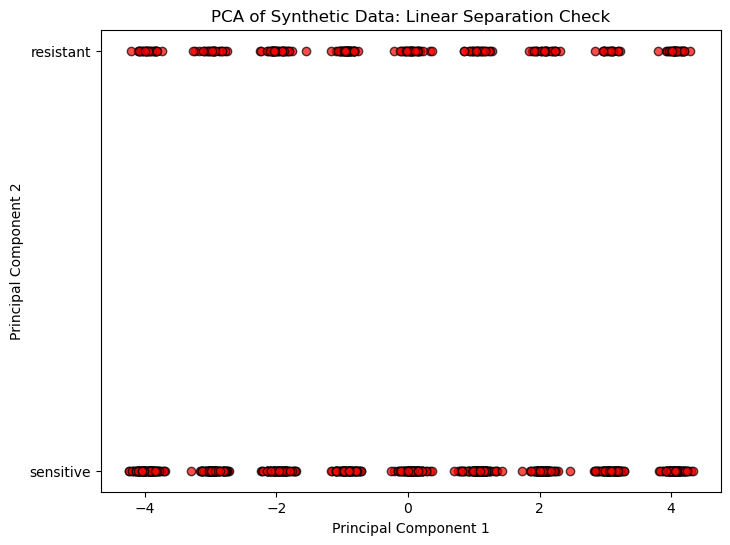

In [123]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Step 4: Visualize PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 1],y_imputed , c='red', cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('PCA of Synthetic Data: Linear Separation Check')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

testing using svm

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 4: Train a Support Vector Machine (SVM) model
model = SVC(kernel='linear', C=1)  # Linear kernel and regularization strength C=1
model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [125]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9062
Test Accuracy: 0.8550


In [126]:
cv_scores = cross_val_score(model, X_scaled, y_imputed, cv=5)  # 5-fold cross-validation

print(f"Cross-validation Scores: {cv_scores}")
print(f"Average Cross-validation Score: {cv_scores.mean():.4f}")

Cross-validation Scores: [0.815 0.82  0.835 0.91  0.865]
Average Cross-validation Score: 0.8490
